In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="darkgrid")

# load the dataframe

In [2]:
df = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2.txt", index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]
df

df.head()

,Textstelle,Metapher?,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,NaN,Fachausdruck,B
2,"Diese wolle die bittere Auslese, ohne die auc...",Metapher,bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",Metapher,ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B
4,In Californien ist ebenso die früher dort hei...,Metaphernkandidat,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B


In [3]:
df["Metapher?"].value_counts()

Metaphernkandidat    1785
Metapher              777
Unklar                  3
Grenzfall               1
Name: Metapher?, dtype: int64

In [4]:
df["Metapher"] = (df["Metapher?"] == "Metapher").astype(int)
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat").astype(int)
df.drop("Metapher?", axis=1, inplace = True)
df

,Textstelle,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator,Metapher,Kandidat
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,NaN,Fachausdruck,B,0,1
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1
...,...,...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,NaN,B,0,1
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",einer turmhohen Mauer,Schutzzöllen,A,NaN,B,1,0
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,mütterlichen Päppelflasche,Sie,B,NaN,B,1,0
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,NaN,B,0,1


In [5]:
stelle = "Der politische Körper verwendet in beiden Fällen seine meiste Kraft"
stelle +=" auf die Zunahme von Zähnen und Krallen."
clms = ["Textstelle", "Annotator", "Metapher", "Kandidat"]
df.loc[ [stelle in text for text in df["Textstelle"]], clms]

,Textstelle,Annotator,Metapher,Kandidat
378,"""Der politische Körper verwendet in beiden Fä...",B,1,0
958,"""Der politische Körper verwendet in beiden Fä...",K,1,0
1406,"""Der politische Körper verwendet in beiden Fä...",A,0,1


In [6]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat"]].sum()
data

,Metapher,Kandidat
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",2,1
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,3
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,3
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,2
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,3
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,3
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,2
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",2,1


In [7]:
erklärung = df.groupby(["Textstelle"])[["Fokus", "Rahmen"]].first()
erklärung[erklärung.isnull()] = np.nan
erklärung

,Fokus,Rahmen
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",Zähnen und Krallen,der politische Körper
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",NaN,NaN
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",NaN,NaN
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""","Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",NaN,NaN
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",NaN,NaN
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",verstellbare Puppen,staatliche Menschenverhältnisse
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",schwindsüchtig ist,daß eine Philosophie


In [8]:
data = data.merge(erklärung, on = "Textstelle")
data

,Metapher,Kandidat,Fokus,Rahmen
Textstelle,,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",2,1,Zähnen und Krallen,der politische Körper
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,3,NaN,NaN
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,3,NaN,NaN
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,3,NaN,NaN
...,...,...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,3,NaN,NaN
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,2,verstellbare Puppen,staatliche Menschenverhältnisse
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",2,1,schwindsüchtig ist,daß eine Philosophie


In [9]:
text = data.index[4]
text = text.replace('"', '')
text

' Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden,'

In [10]:
for i in [  6,  89, 138, 146, 248, 273, 307, 345]:
    print(data.index[i])
    print()

 "Wir behaupten nicht, daß die Bildung der einzige Faktor sei, der die Geburtenziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequem- ziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequemlichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit lichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit dem heißen Wunsch, in materieller Beziehung auf einen höheren und besseren Fuß zu kommen, solche intellektuelle und moralische Eigenschaften anhäuft, die für eine hohe Geburtenziffer wenig günstig sind . . . . burtenziffer wenig günstig sind . . . . 

 Der beste Gesetzgeber ist deshalb derjenige, der sein Ziel stufenmäßig durch möglichst geringe Abänderungen der jeweilig geltenden recht- mäßig durch möglichst geringe Abänderungen der jeweilig geltenden rechtlichen Regelung erreicht, weil er auf diese Weise einmal sein Volk vor lichen Regelung erreicht, weil e

In [11]:
data.index[171]

' Es kann z. B. vorkommen, daß die Determinantenart a in allen oder fast allen väterlichen Iden homodynam ist (a1), während sie in den mütterlichen Iden nur durch eine Minorität (a1) vertreten ist und die große Mehrheit der mütterlichen Ide eine andere Variante (a2) dieser Determinantenart besitzt. Nach erfolgter Amphimixis wird die im mütterlichen Keimplasma dominierende Variante (a2) gegenüber der im väterlichen dominierenden (a1) in die Minorität geraten, da die a1 aus den mütterlichen Iden mit den a1 nierenden (a1) in die Minorität geraten, da die a1 aus den mütterlichen Iden mit den a1 aus den väterlichen homodynam sind, während a2 auf der väterlichen Seite keine Bundesgenossen vorfindet, wenn dort alle Ide die Variante a1 haben oder auch, wenn eine kleine genossen vorfindet, wenn dort alle Ide die Variante a1 haben oder auch, wenn eine kleine Minorität auf der väterlichen Seite zwar nicht a1, aber auch nicht a2, sondern eine Variante a3 besitzt.'

In [12]:
data.index[342]

' »Die fortschreitende Gesellschaftsbilduug (Civilisation) ist das höchste Ergebnis der vervollkommnenden Auslese der menschlichen Daseinskämpfe; genauer gesagt — ist sie das unausbleibliche Produkt aller Daseins- und Interessenkämpfe, kämpfe, welche von den sozialen Einheiten jeder Entwickelungsstufe teils unter sich, teils gegen die äußere Natur, mit den wachsenden Mitteln der Menschlichen Geistes-, Körperund Vermögensausstattung und innerhalb einer durch Recht und Sitte gesetzten Streit- und Vermögensausstattung und innerhalb einer durch Recht und Sitte gesetzten Streitorganisation ausgekämpft, organisation ausgekämpft, durch den Trieb individueller und kollektiver Selbsterhaltung, durch den organischen Vermehrungstrieb, durch den Eigennutz, durch gemeinnützige Verbesserungsbestrebungen erweckt und in immer höherem Grade erneuert, um die Befriedigung nicht bloß der sinnlichen Notdurft, sondern mehr und mehr um ein steigendes Maß höherer materieller und ideeller Lebensansprüche gefüh

In [13]:
data.index[354]

' Übrigens haben wir bereits im 9. Kapitel (S. 235-240) gesehen, daß einerseits die Rechenmanöver, die sich auf das Glück einer Gesellschaft beziehen, seits die Rechenmanöver, die sich auf das Glück einer Gesellschaft beziehen, mit ebenso unüberwindlichen Schwierigkeiten zu kämpfen haben wie der Versuch, einen Regenbogen zu besteigen, und daß andererseits von dem Aus- such, einen Regenbogen zu besteigen, und daß andererseits von dem Aussichtspunkt, den die Descendenztheorie gewährt, wahrnehmbar ist, daß Glücks- sichtspunkt, den die Descendenztheorie gewährt, wahrnehmbar ist, daß Glücksempfindungen irgendwelcher Gruppe oder Summe von Personen nicht das empfindungen irgendwelcher Gruppe oder Summe von Personen nicht das Ziel der inneren Politik sein können, sondern ausschließlich die Anpassung an die Bedingungen, von denen für das Gemeinwesen der Sieg im Daseinskampf abhängt.'

In [14]:
def eliminate_substring(text, k=20):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

In [15]:
eliminate_substring(text)

' Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden,'

In [16]:
text = data.index[6]
text

' "Wir behaupten nicht, daß die Bildung der einzige Faktor sei, der die Geburtenziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequem- ziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequemlichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit lichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit dem heißen Wunsch, in materieller Beziehung auf einen höheren und besseren Fuß zu kommen, solche intellektuelle und moralische Eigenschaften anhäuft, die für eine hohe Geburtenziffer wenig günstig sind . . . . burtenziffer wenig günstig sind . . . . '

In [17]:
text = eliminate_substring(text)
text = eliminate_substring(text)
text = eliminate_substring(text)
text = eliminate_substring(text)
text

' "Wir behaupten nicht, daß die Bildung der einzige Faktor sei, der die Geburten- ziffer verkleinert; sie ist nur einer dieser Faktoren, der, verbunden mit materieller Bequemlichkeit, mit weniger lebhaften und weniger wahmehmbaren religiösen Gefühlen und mit dem heißen Wunsch, in materieller Beziehung auf einen höheren und besseren Fuß zu kommen, solche intellektuelle und moralische Eigenschaften anhäuft, die für eine hohe Geburtenziffer wenig günstig sind . . . . '

In [18]:
data.reset_index(inplace = True)
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data

,Textstelle,Metapher,Kandidat,Fokus,Rahmen
0,Der politische Körper verwendet in beiden Fäl...,2,1,Zähnen und Krallen,der politische Körper
1,Immer noch wird durch die protestantische Leh...,0,3,NaN,NaN
2,"Kein Zweifel, schreibt Alb. Schaeffle 1), vor...",0,3,NaN,NaN
3,Mit je weiterem Blick wir die Stoffwelt zu üb...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
4,Solange das Menschengeschlecht seinen Zerstör...,0,3,NaN,NaN
...,...,...,...,...,...
801,verlaufs; sie hat Naturforschung in dem von un...,0,3,NaN,NaN
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse
803,wenn wir von dem schlechten Worte »Rechtsphilo...,2,1,schwindsüchtig ist,daß eine Philosophie
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,NaN,NaN


Before cleaning: 
 mean:   261.741 
median: 231.000
Before cleaning: 
 mean:   241.110 
median: 215.500


/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_14845/2389099236.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_14845/2389099236.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_14845/2389099236.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_14845/2389099236.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")


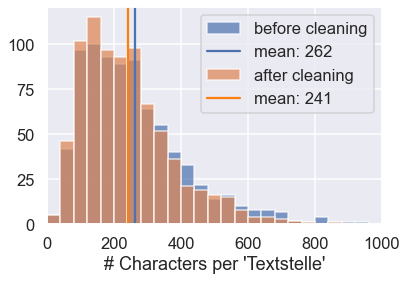

In [19]:
bins = np.arange(0, 1000, 40)

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7, label="before cleaning");

mean = data["Textstelle"].str.len().mean()
median = data["Textstelle"].str.len().median()

plt.axvline(mean, label=f"mean: {mean:.0f}")
#plt.axvline(median, label="median")

print(f"Before cleaning: \n \
mean:   {mean:.3f} \n\
median: {median:.3f}")

data["Kürzungen"] = 0

for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

#remove digits    
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')
# remove brackets:
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
# remove quotation marks
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
# remove special characters
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
# remove leading whitespace
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")



data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7, label="after cleaning");

mean = data["Textstelle"].str.len().mean()
median = data["Textstelle"].str.len().median()

plt.axvline(mean, label=f"mean: {mean:.0f}", c = "tab:orange")
#plt.axvline(median, label="median", c = "tab:orange")

print(f"Before cleaning: \n \
mean:   {mean:.3f} \n\
median: {median:.3f}")

plt.legend()
plt.xlabel("# Characters per 'Textstelle'");
plt.xlim([0, 1000]);

Text(0, 0.5, 'iterations')

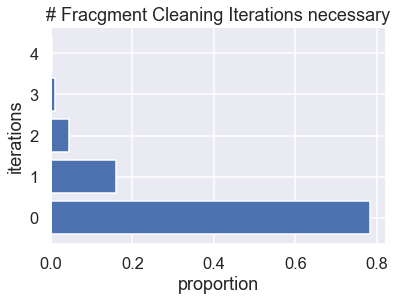

In [20]:
vc = data["Kürzungen"].value_counts(normalize=True)

plt.barh(vc.index, vc);
plt.title("# Fracgment Cleaning Iterations necessary")
plt.xlabel("proportion");
plt.ylabel("iterations")

In [21]:
np.where(data["Kürzungen"] == 3)

(array([  6,  89, 138, 146, 248, 273, 307, 345]),)

In [22]:
df.loc[354, "Textstelle"]

' Doch sind die Grenzen beider Reiche, die zusammen das Forschungsgebiet der Ethik bilden, im einzelnen nicht genau bestimmbar, und die sozialen Anlagen des Menschen, die vielfach der Erziehung bedürfen, um so wirksam zu werden, wie es bei den anderen Instinkten spontan der Fall ist, gehören, wenn sie ausgebildet sind, beiden Reichen an.'

In [23]:
a

NameError: name 'a' is not defined

In [ ]:
data.drop("Kürzungen", axis=1, inplace = True)

In [ ]:
#remove digits
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

In [ ]:
# remove brackets:
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

In [ ]:
# remove quotation marks
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

In [ ]:
# remove special characters
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

In [ ]:
# remove leading whitespace
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);

# Can we find the Fokus inside the Textstelle?

This is harder than it appears at first. The main task was not finding the Fokus, so there is no unified pattern.

In [ ]:
data[["Textstelle", "Metapher", "Kandidat"]].head()

In [ ]:
from sklearn.preprocessing import normalize

labs = data[["Metapher", "Kandidat"]].to_numpy()
labs = np.exp(labs)
labs = normalize(labs, "l1")
labs

In [ ]:
data[["Metapher", "Kandidat"]] = labs
data.tail()

# GoldStandard

In [ ]:
gold = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2-GoldStandard.csv", index_col=0)
gold

In [ ]:
gold["Metapher"] = (gold["Metapher?"] == "Metapher").astype(int)
gold["Kandidat"] = (gold["Metapher?"] == "Metaphernkandidat").astype(int)
gold.drop("Metapher?", axis=1, inplace = True)
gold

In [ ]:
gold[["Textstelle", "Annotator", "Metapher", "Kandidat"]].head()

In [ ]:
data[["Textstelle", "Metapher", "Kandidat"]].head().round(4)

In [ ]:
data.Textstelle[0]